In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
from arch.univariate import EGARCH
import scipy
from scipy.stats import norm

In [2]:
T=['CHFUSD=X', 'CHFEUR=X', 'CHFJPY=X', 'CHFCNY=X']
A= pd.DataFrame()
for j in T:
    A[j]=wb.DataReader(j,data_source='yahoo',start='1998-01-01')['Adj Close']
pct_change=A.pct_change().dropna()
pct_change

,CHFUSD=X,CHFEUR=X,CHFJPY=X,CHFCNY=X
Date,,,,
2005-03-17,-0.003888,-0.001485,-0.000664,-0.005120
2005-03-18,-0.005328,-0.001224,-0.003644,-0.005595
2005-03-21,-0.012978,-0.000651,-0.008348,-0.011619
2005-03-22,-0.008495,-0.001676,-0.005156,0.001469
2005-03-23,-0.005770,0.000389,-0.002366,-0.014987
2005-03-24,-0.005489,-0.000901,-0.001129,-0.004614
2005-03-25,0.002919,-0.000187,0.001696,-0.000189
2005-03-27,-0.003905,0.001929,0.005305,0.001860
2005-03-28,0.003083,-0.000450,0.003930,-0.003104


In [96]:
pct_change1=pd.DataFrame(np.random.multivariate_normal(pct_change.mean(), pct_change.cov(), 1000))
pct_change1.columns=pct_change.columns
Corr_matrice=pct_change1.corr()
Corr_matrice

,CHFUSD=X,CHFEUR=X,CHFJPY=X,CHFCNY=X
CHFUSD=X,1.000000,0.581734,0.604113,0.647044
CHFEUR=X,0.581734,1.000000,0.372101,0.441899
CHFJPY=X,0.604113,0.372101,1.000000,0.372919
CHFCNY=X,0.647044,0.441899,0.372919,1.000000


In [97]:
L = np.linalg.cholesky(Corr_matrice)
L

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.58173385,  0.8133792 ,  0.        ,  0.        ],
       [ 0.60411345,  0.02540925,  0.79649313,  0.        ],
       [ 0.64704394,  0.08051777, -0.02512817,  0.75777279]])

In [112]:
Un_sample=[]
d=3
for i in range(10000):
    Z=np.random.standard_normal(len(T))
    G=np.dot(L,Z)
    Un_sample.append(scipy.stats.norm.cdf(G))
    

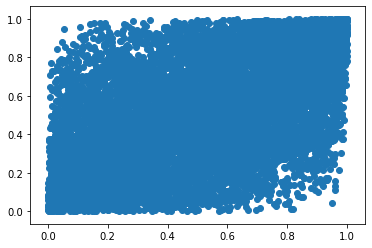

In [113]:
ARRAYS=np.array(Un_sample).T
plt.scatter(ARRAYS[0], ARRAYS[1])
plt.show()

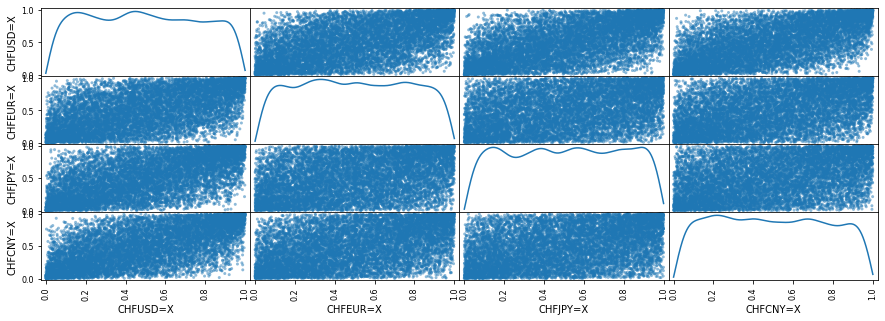

In [114]:
df=pd.DataFrame(Un_sample)
df.columns=pct_change.columns
pd.plotting.scatter_matrix(df, alpha=0.5,figsize=(15,5),diagonal='kde')
plt.show()

In [123]:
Inverse_transformation = np.asarray([np.quantile(pct_change.iloc[:, i], df.iloc[:,i]) for i in range(0, len(pct_change.columns))])

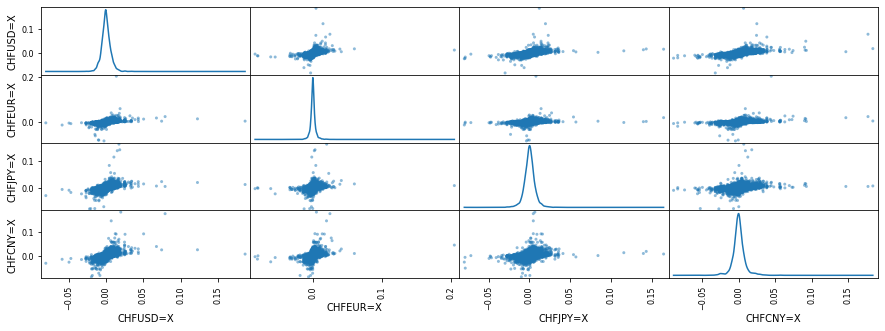

In [124]:
Inverse_transformation=pd.DataFrame(Inverse_transformation.T)
Inverse_transformation.columns=pct_change.columns
pd.plotting.scatter_matrix(Inverse_transformation, alpha=0.5,figsize=(15,5),diagonal='kde')
plt.show()

In [163]:
Portfolio_returns=np.dot(np.array([0.25,0.25,0.25,0.25]),Inverse_transformation.T)

In [164]:
Portfolio_returns=pd.DataFrame(Portfolio_returns)

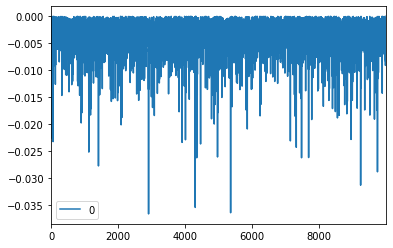

In [166]:
Portfolio_returns_negatives=Portfolio_returns.mask(Portfolio_returns>0).dropna()
Portfolio_returns_negatives.plot()
plt.show()

In [167]:
VaR=Portfolio_returns_negatives.quantile(0.01)
CVaR=(Portfolio_returns_negatives.mask(Portfolio_returns_negatives>VaR[0]).dropna()).mean()
print('-'*99)
print('VaR 99% Gaussian Normal = '+str(round(VaR.values[0]*100,2))+'%')
print('-'*99)
print('CVaR 99% Gaussian Normal ='+str(round(CVaR.values[0]*100,2))+'%')

---------------------------------------------------------------------------------------------------
VaR 99% Gaussian Normal = -1.62%
---------------------------------------------------------------------------------------------------
CVaR 99% Gaussian Normal =-2.14%


In [24]:
#T-student

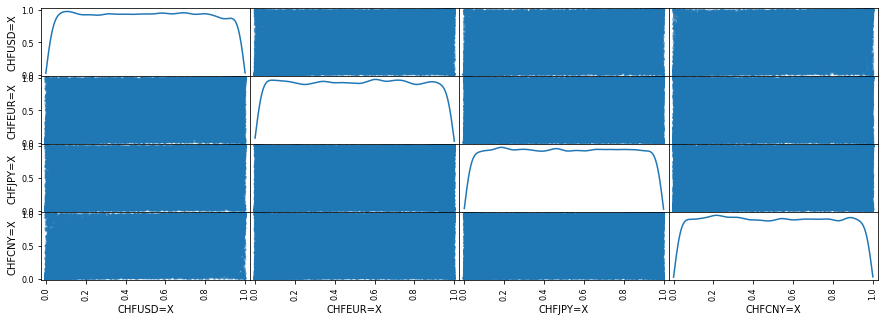

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import invgamma, chi2, t

#Define number of sampling points
n_samples = 100000
df = 4

calib_correl_matrix = np.array(Corr_matrice) 
mu = np.zeros(len(calib_correl_matrix))
s = chi2.rvs(df, size=n_samples)[:, np.newaxis]
Z = np.random.multivariate_normal(mu, calib_correl_matrix,n_samples)
X = np.sqrt(df/s)*Z 
U = t.cdf(X,df)
U = pd.DataFrame(U)
U.columns=pct_change.columns
pd.plotting.scatter_matrix(U,figsize=(15,5), diagonal = 'kde')
plt.show()

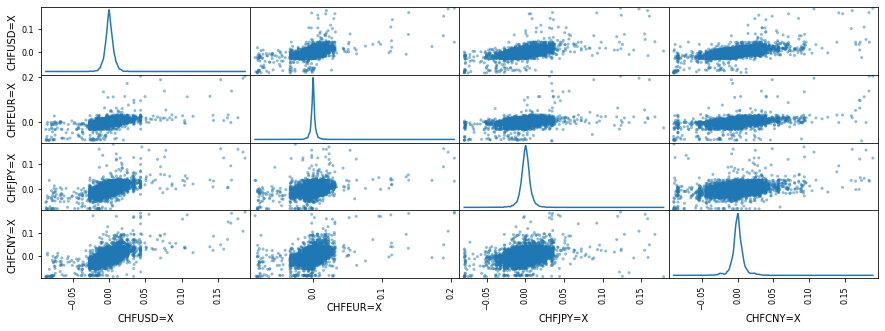

In [140]:
U_scaled = np.asarray([np.quantile(pct_change.iloc[:, i], U.iloc[:,i]) for i in range(0, len(pct_change.columns))])
U_scaled = pd.DataFrame(U_scaled).T
U_scaled.columns=U.columns
pd.plotting.scatter_matrix(U_scaled, figsize=(15,5), diagonal = 'kde')
#F_inv_U=t.pdf(F_inv_U,df)
#Inverse_transformation=F_inv_U
plt.show()

In [149]:
Portfolio_returns=np.dot((np.array([0.25,0.25,0.25,0.25])),U_scaled.T)

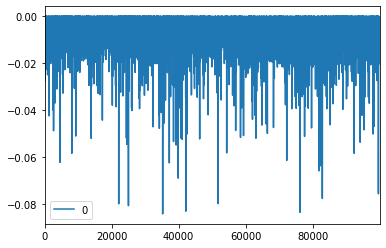

In [150]:
Portfolio_returns=pd.DataFrame(Portfolio_returns)
Portfolio_returns_negatives=Portfolio_returns.mask(Portfolio_returns>0).dropna()
Portfolio_returns_negatives=Portfolio_returns.mask(Portfolio_returns>0).dropna()
Portfolio_returns_negatives.plot()
plt.show()

In [151]:
VaR=Portfolio_returns_negatives.quantile(0.01)
CVaR=(Portfolio_returns_negatives.mask(Portfolio_returns_negatives>VaR[0]).dropna()).mean()
print('-'*99)
print('VaR 99% student t = '+str(round(VaR.values[0]*100,2))+'%')
print('-'*99)
print('CVaR 99% student t ='+str(round(CVaR.values[0]*100,2))+'%')

---------------------------------------------------------------------------------------------------
VaR 99% student t = -1.84%
---------------------------------------------------------------------------------------------------
CVaR 99% student t =-2.74%


In [157]:
import pyvinecopulib as pv
import numpy as np

# Simulate some data
#np.random.seed(1234)  # seed for the random generator
n = 100000  # number of observations
d = len(pct_change.T)  # the dimension  # covariance matrix
#cov = Corr_matrice  # make it non-negative definite
x = pct_change.values

# Transform copula data using the empirical distribution
u = pv.to_pseudo_obs(pct_change.values)

# Fit a Gaussian vine
# (i.e., properly specified since the data is multivariate normal)
controls = pv.FitControlsVinecop(family_set=[pv.BicopFamily.clayton])
cop = pv.Vinecop(u, controls=controls)

# Sample from the copula
n_sim = 100000
u_sim = cop.simulate(n_sim)

# Transform back simulations to the original scale
x_sim = np.asarray([np.quantile(x[:, i], u_sim[:, i]) for i in range(0, d)])

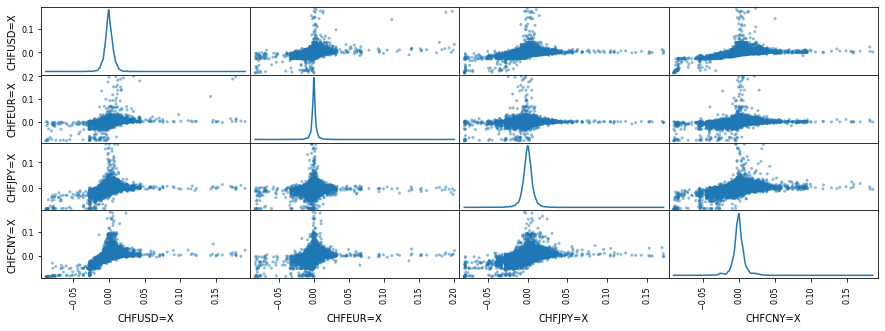

In [158]:
Copula=pd.DataFrame(x_sim).T
Copula.columns=pct_change.columns
pd.plotting.scatter_matrix(Copula, alpha=0.5,figsize=(15,5),diagonal='kde')
plt.show()

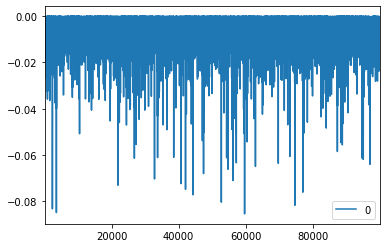

In [159]:
Portfolio_returns=np.dot((np.array([0.25,0.25,0.25,0.25])),Copula.T)
Portfolio_returns=pd.DataFrame(Portfolio_returns)
Portfolio_returns_negatives=Portfolio_returns.mask(Portfolio_returns>0).dropna()
Portfolio_returns_negatives=Portfolio_returns.mask(Portfolio_returns>0).dropna()
Portfolio_returns_negatives.plot()
plt.show()

In [161]:
VaR=Portfolio_returns_negatives.quantile(0.01)
CVaR=(Portfolio_returns_negatives.mask(Portfolio_returns_negatives>VaR[0]).dropna()).mean()
print('-'*99)
print('VaR 99% clayton = '+str(round(VaR.values[0]*100,2))+'%')
print('-'*99)
print('CVaR 99% clayton ='+str(round(CVaR.values[0]*100,2))+'%')

---------------------------------------------------------------------------------------------------
VaR 99% clayton = -1.99%
---------------------------------------------------------------------------------------------------
CVaR 99% clayton =-3.03%
